In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from importlib import reload
from neuropacks import AC1
from noise_correlations import analysis, plot, utils

%matplotlib inline

In [2]:
base_path = '/Volumes/pss'

In [4]:
data_path = os.path.join(base_path, 'data/ac1/R32_B7_HG_ext_rsp.h5')
ac = AC1(data_path=data_path)

In [5]:
X = ac.get_response_matrix(amplitudes=[2, 3, 4, 5, 6, 7])
stimuli = np.log(ac.get_design_matrix(amplitudes=[2, 3, 4, 5, 6, 7]))
unique_stimuli = np.unique(stimuli)

In [6]:
peak_responses = utils.get_peak_response(X, stimuli)
modulation_fractions = utils.get_tuning_modulation_fraction(X, stimuli)

# Characterizing response distributions

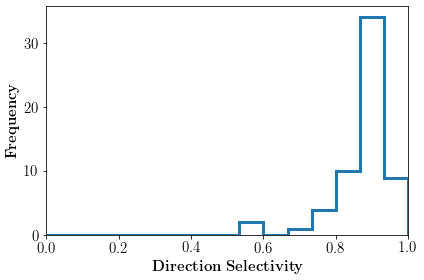

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.hist(
    modulation_fractions,
    histtype='step',
    bins=np.linspace(0, 1, 16),
    linewidth=3)

ax.set_xlim([0, 1])
ax.set_xlabel(r'\textbf{Peak Response}', fontsize=15)
ax.set_xlabel(r'\textbf{Modulation Fractions}', fontsize=15)
ax.set_xlabel(r'\textbf{Direction Selectivity}', fontsize=15)

ax.set_ylabel(r'\textbf{Frequency}', fontsize=15)
ax.tick_params(labelsize=15)
    
plt.tight_layout()

# Plot tuning curves

In [24]:
var_to_mean_thres = 10
responsive_thres = 1
modulation_frac_thres = 0.75

In [25]:
# identify tuned, responsive, and other populations of neurons
tuned_units = utils.get_tuned_units(
    X=X, stimuli=stimuli, aggregator=np.mean,
    peak_response=responsive_thres,
    tuning_criteria='modulation_frac',
    modulation_frac=modulation_frac_thres,
    variance_to_mean=var_to_mean_thres)
responsive_units = utils.get_responsive_units(
    X=X, stimuli=stimuli, aggregator=np.mean,
    peak_response=responsive_thres,
    variance_to_mean=var_to_mean_thres)
responsive_non_tuned_units = np.array(
    [responsive & ~tuned for responsive, tuned in zip(responsive_units, tuned_units)]
)
non_responsive_units = np.array(
    [~responsive for responsive in responsive_units]
)

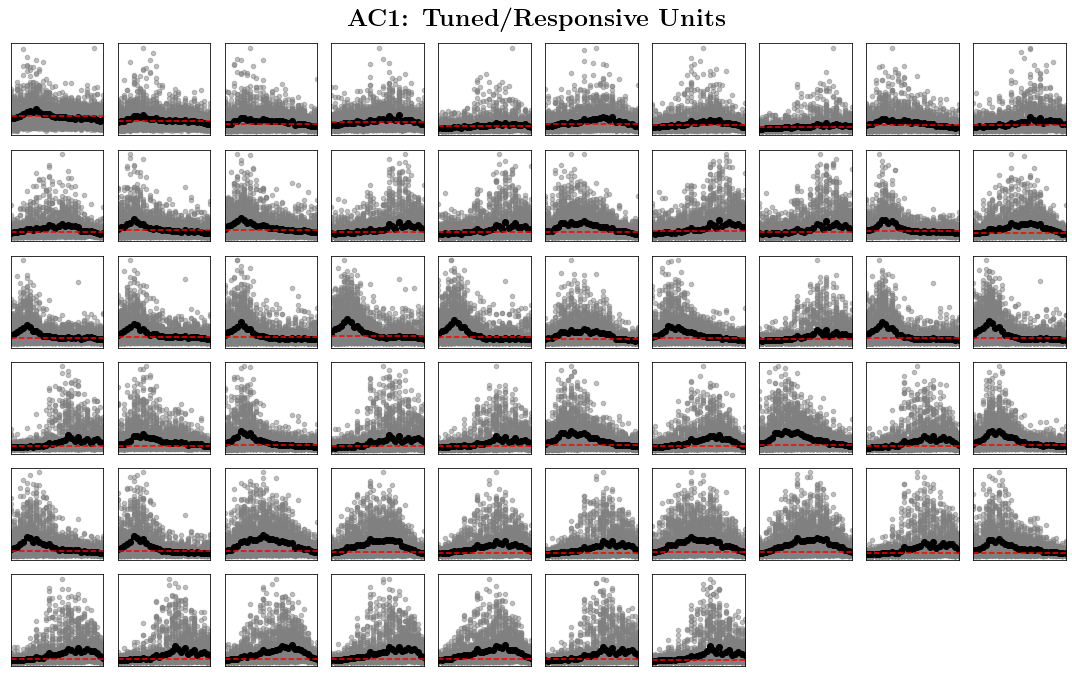

In [26]:
fig, axes = plot.plot_tuning_curves(
    X[:, tuned_units], stimuli,
    n_cols=10, include_points=True, use_title=False,
    sort='modulation')

for idx, ax in enumerate(axes.ravel()):
    if idx < tuned_units.sum():
        ax.axhline(responsive_thres, color='r', linestyle='--')

fig.text(x=0.5, y=1.02, s=r'\textbf{AC1: Tuned/Responsive Units}',
         va='center', ha='center', fontsize=25)
plt.tight_layout()
# plt.savefig('ac1_tuned.png', bbox_inches='tight')
plt.show()

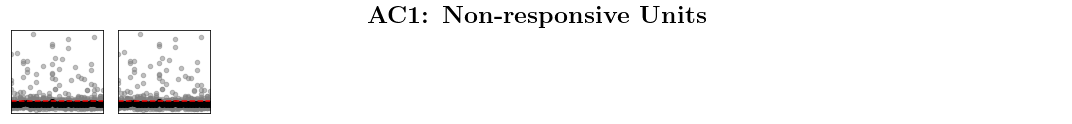

In [27]:
fig, axes = plot.plot_tuning_curves(
    X[:, non_responsive_units], stimuli,
    n_cols=10, include_points=True, use_title=False,
    sort='modulation')

for idx, ax in enumerate(axes.ravel()):
    if idx < non_responsive_units.sum():
        ax.axhline(responsive_thres, color='r', linestyle='--')

fig.text(x=0.5, y=1.02, s=r'\textbf{AC1: Non-responsive Units}',
         va='center', ha='center', fontsize=25)
plt.tight_layout()
# plt.savefig('ac1_non_responsive.png', bbox_inches='tight')
plt.show()

# Noise Correlations

In [30]:
all_corrs = analysis.all_correlations(X, stimuli)
responsive_corrs = analysis.all_correlations(X, stimuli, u1=responsive_units)
non_responsive_corrs = analysis.all_correlations(X, stimuli, u1=non_responsive_units)

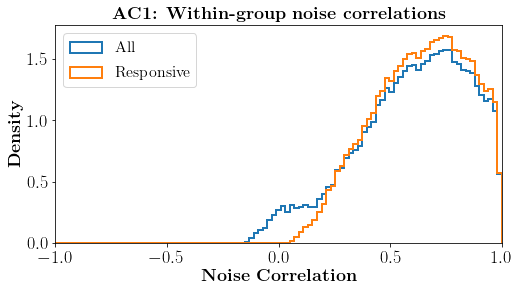

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
bins = np.linspace(-1, 1, 100)
ax.hist(all_corrs, bins=bins,
        density=True,
        histtype='step',
        linewidth=2,
        label='All')
ax.hist(responsive_corrs, bins=bins,
        density=True,
        histtype='step',
        linewidth=2,
        label='Responsive')

ax.set_xlim([-1, 1])
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.tick_params(labelsize=18)
ax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=18)
ax.set_ylabel(r'\textbf{Density}', fontsize=18)
ax.set_title(r'\textbf{AC1: Within-group noise correlations}', fontsize=18)
plt.legend(loc=2, prop={'size': 16})
# plt.savefig('ac1_within_group_noise_correlations.pdf', bbox_inches='tight')
plt.show()